In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans

%load_ext autoreload
%autoreload
from src.dataLoader import dataLoader
from src.utils import image_utils, ismember

from src.preprocessing import imadjust,imagecrop


In [2]:
dataset = dataLoader("./data")
imageFileList = dataset.LoadFileList()

In [3]:
whitehead_sample = dataLoader("./sample/whitehead")
whitehead_sampleFileList = dataset.LoadFileList()

In [4]:
from scipy import spatial

def calculate_cosine_distance(a, b):
    cosine_distance = float(spatial.distance.cosine(a, b))
    return cosine_distance


def calculate_cosine_similarity(a, b):
    cosine_similarity = 1 - calculate_cosine_distance(a, b)
    return cosine_similarity

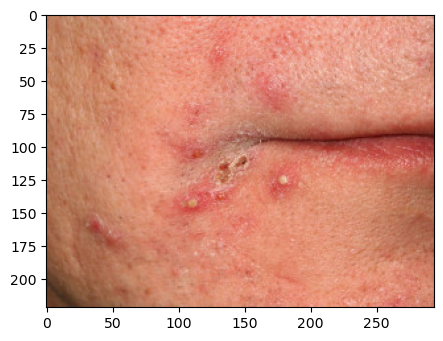

13 13
222


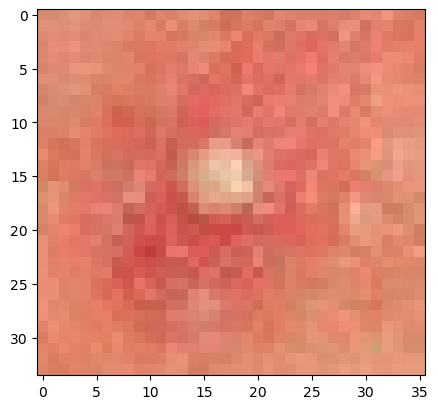

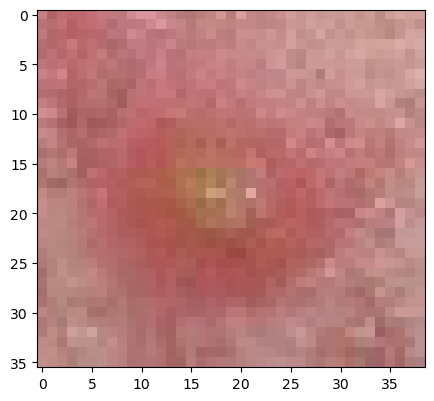

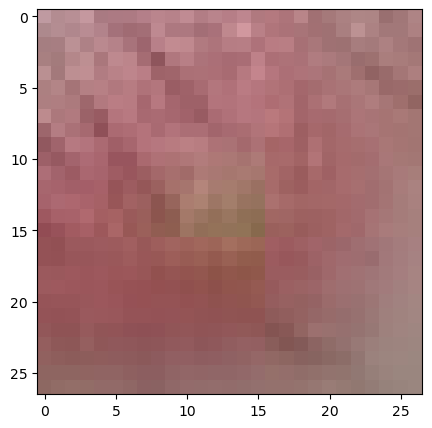

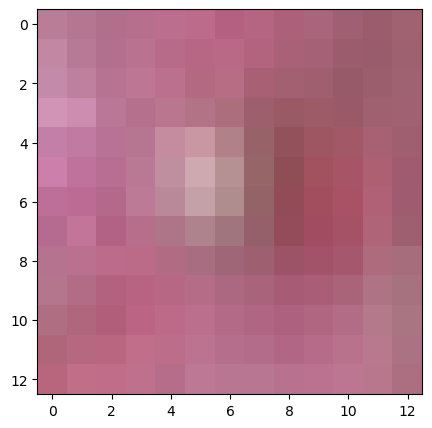

13.562363834422658


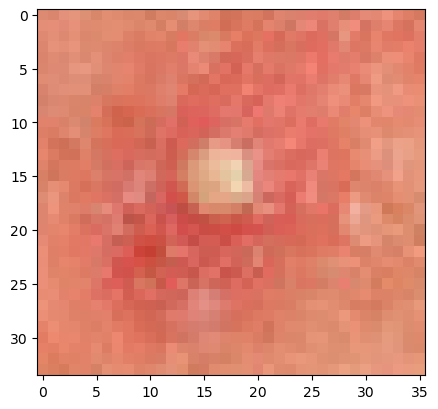

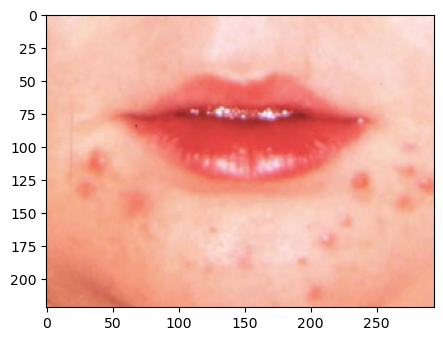

13 13
222


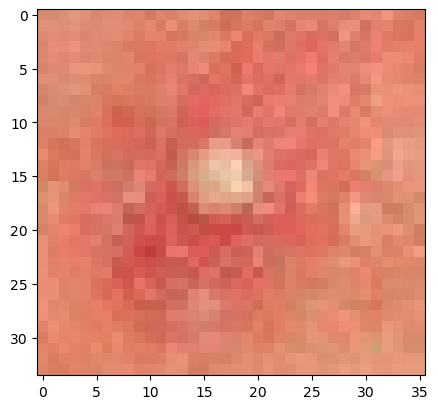

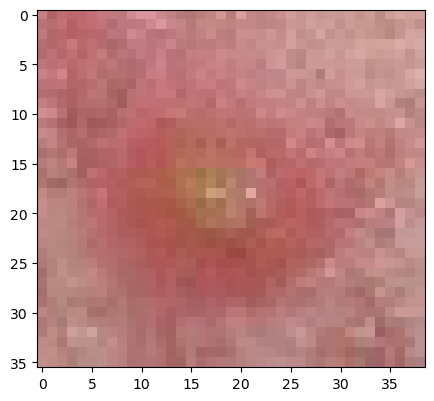

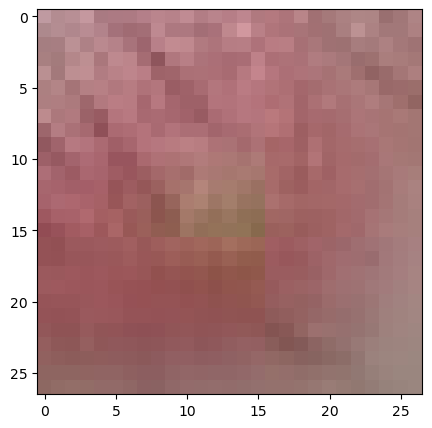

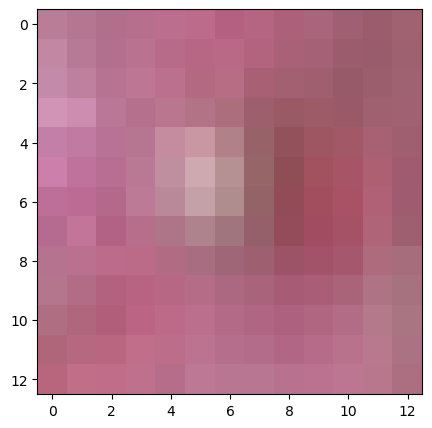

74.74428104575163


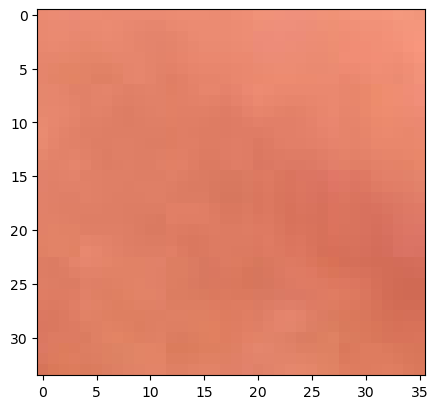

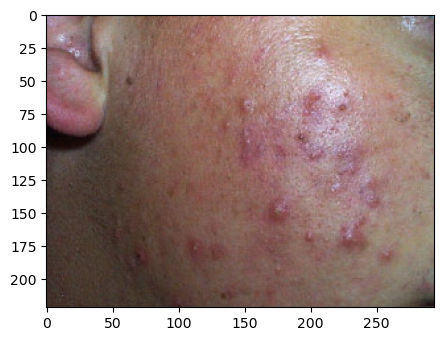

13 13
222


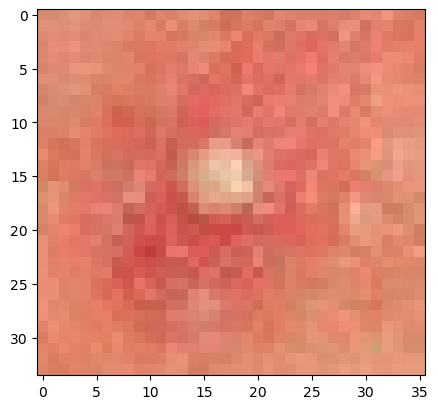

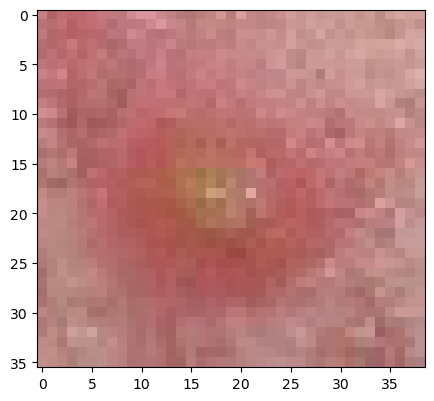

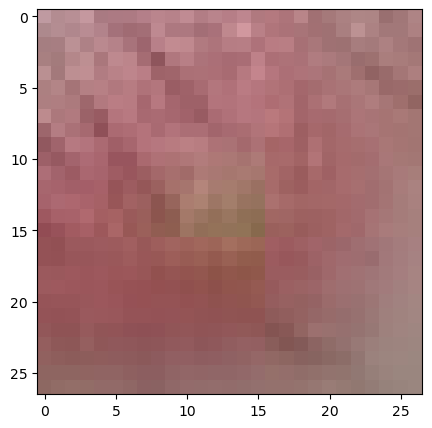

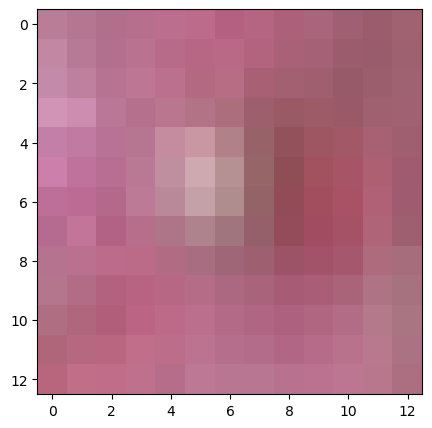

90.61138344226579


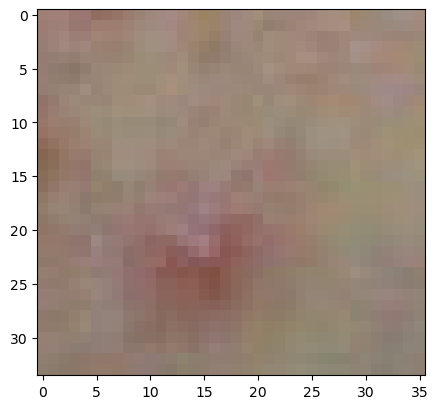

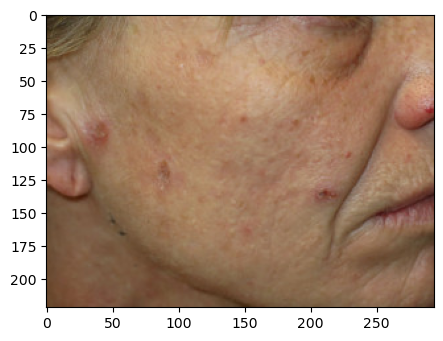

13 13
222


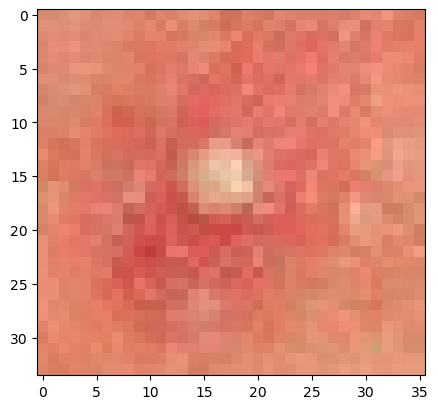

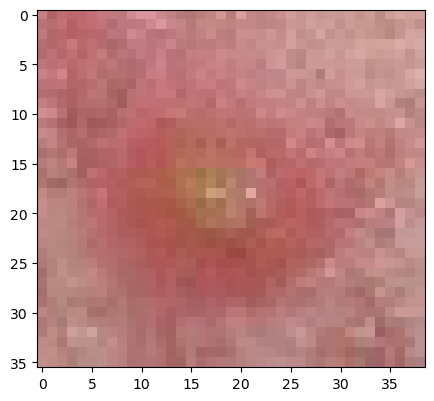

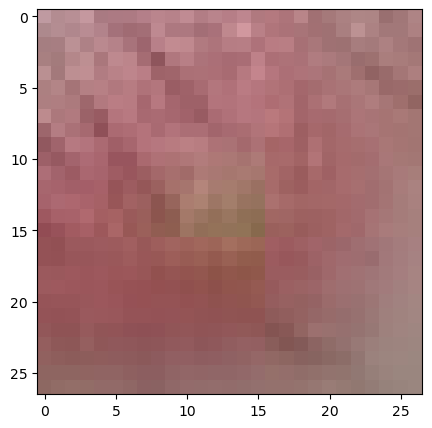

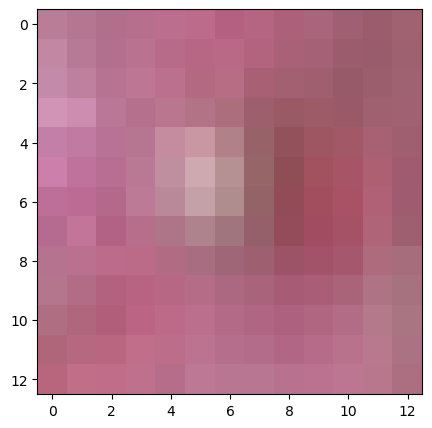

85.85048010973937


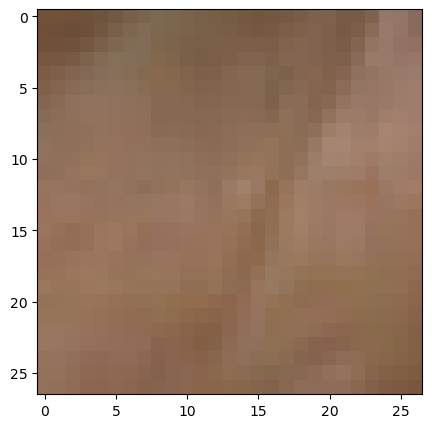

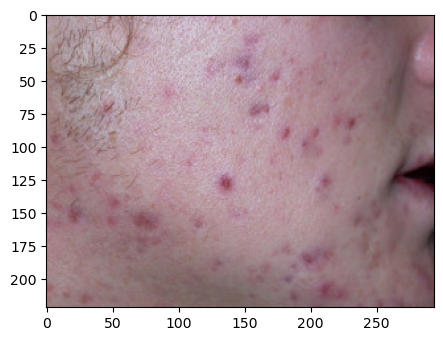

13 13
222


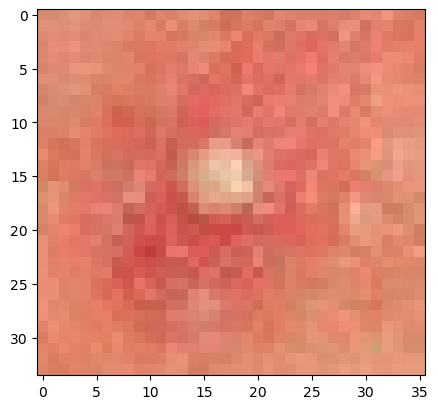

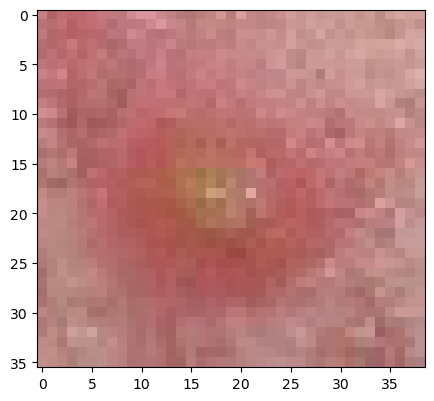

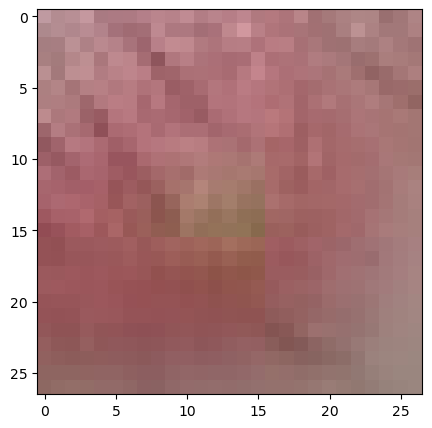

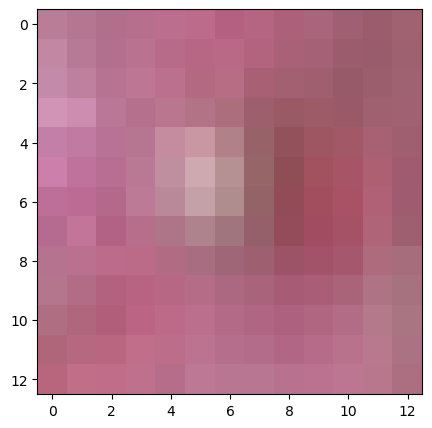

80.36716963877458


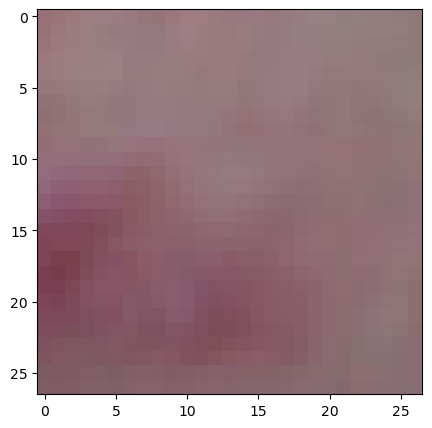

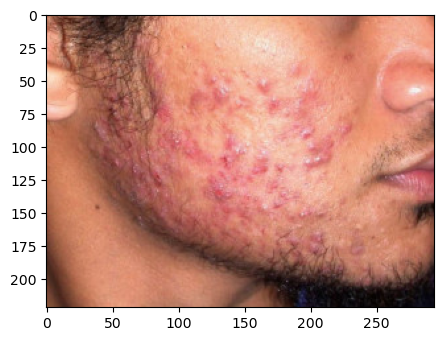

13 13
222


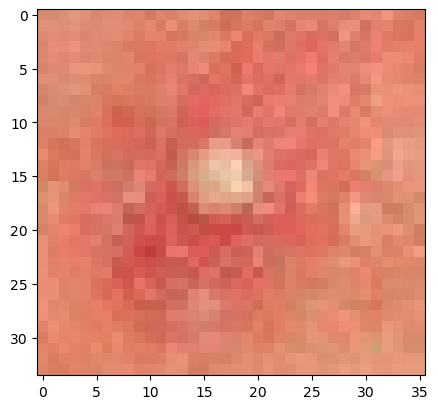

KeyboardInterrupt: 

In [78]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error

dataset = []
strideH, strideV = (1,1)
feature_img  = None
similarities = []

for image_path in imageFileList[:10]:
    # get RGB image
    color_image= image_utils().get_image(image_path, image_scale=cv2.COLOR_BGR2RGB, is_gray=False)
    image_utils().plot_image(color_image,figsize=(5,5))
    # dataset.append(color_image.reshape(-1))
    img_h, img_w, img_ch = color_image.shape
    Vscan, Hscan = (0,0)
    print(Hscan+window_w, Vscan+window_h)
    print(img_h)
    err_lowest = 1e8
    for sample_image_path in whitehead_sampleFileList:
        # get RGB image
        color_sample = image_utils().get_image(sample_image_path, image_scale=cv2.COLOR_BGR2RGB, is_gray=False)
        image_utils().plot_image(color_sample,figsize=(5,5))
        window_h,window_w, window_ch = color_sample.shape
        while(Vscan+window_h<img_h):
            Hscan=0
            while(Hscan+window_w<img_w):
                feature_temp = color_image[Vscan:Vscan+window_h, Hscan:Hscan+window_w, :]
                # print(cosine_similarity(feature_temp.reshape(window_h*window_w,-1), color_sample.reshape(window_h*window_w,-1)).mean())
                # sim = round(cosine_similarity(feature_temp.reshape(window_h*window_w,-1), color_sample.reshape(window_h*window_w,-1)).reshape(window_h,window_w,-1).values,4)
                # sim = round(calculate_cosine_similarity(feature_temp.flatten(), color_sample.flatten()),4)
                err = mean_squared_error(feature_temp.flatten(), color_sample.flatten())
                similarities.append(err)
                if err_lowest > err:
                    feature_img = feature_temp
                    err_lowest = err
                else:
                    pass  
                Hscan += strideH
                # if (Vscan+Vscan+window_h)/2>120 and (Vscan+Vscan+window_h)/2<140 and (Hscan+Hscan+window_w)/2>160 and (Hscan+Hscan+window_w)/2<190:
                #     print(sim)
                #     image_utils().plot_image(feature_temp,figsize=(5,5))
            Vscan += strideV
    print(err_lowest)
    image_utils().plot_image(feature_img,figsize=(5,5))
    print("="*50)

In [41]:
np.array(similarities).reshape(int(Hscan/strideV), int(Vscan/strideH))

array([[0.6987512 , 0.73844458, 0.72785276, ..., 0.73773383, 0.77080226,
        0.73859048],
       [0.74355756, 0.75130883, 0.74644932, ..., 0.79631218, 0.79059317,
        0.80131312],
       [0.82398473, 0.81621366, 0.83605976, ..., 0.78355134, 0.77621606,
        0.77597495],
       ...,
       [0.77654413, 0.77790841, 0.77456997, ..., 0.80114175, 0.76757831,
        0.76820097],
       [0.75419852, 0.76865024, 0.80083296, ..., 0.81578767, 0.82052799,
        0.8186642 ],
       [0.81381549, 0.79549294, 0.79812583, ..., 0.77525305, 0.76183863,
        0.75066763]])

In [42]:
188*258

48504

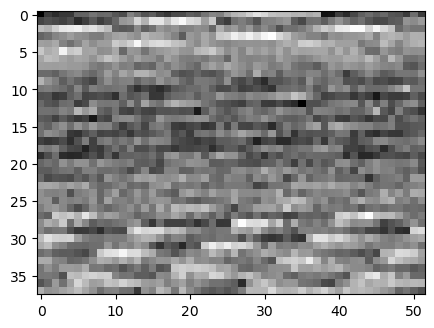

In [43]:
image_utils().plot_image(np.array(similarities).reshape(int(Hscan/strideV), int(Vscan/strideH))*100,figsize=(5,5))

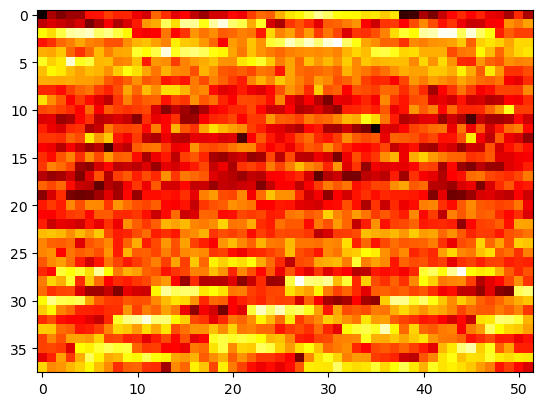

In [44]:
plt.imshow(np.array(similarities).reshape(int(Hscan/strideV), int(Vscan/strideH)), cmap='hot', interpolation='nearest')
plt.show()